<a href="https://colab.research.google.com/github/cbernet/introduction_machine_learning/blob/master/notebooks/deep_learning_intro/keras_tensorflow_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Purpose of the exercise

In this exercise, we will train a simple dense neural network to classify a simple 2D dataset in three categories.

You will learn the basic features of the Keras interface to TensorFlow : 

* one-hot encoding 
* model specification, with both the functional and sequential model APIs. 
* model compilation and fit
* plotting the loss and validation as a function of the epoch


## Hardware and Software

Before starting, we check our version of TensorFlow:

In [9]:
import tensorflow as tf
tf.__version__

'2.3.0'

And we check if we have a GPU: 

In [13]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

If the list is empty, change your runtime: Runtime menu > Change runtime type > GPU. And re-run the cell above. 

Finally, let's get more information on our GPU with the `nvidia-smi` shell command: 

In [12]:
!nvidia-smi

Mon Oct 19 07:44:59 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |     11MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Dataset generation

In [1]:
from sklearn.datasets import make_blobs

In [2]:
data, targets = make_blobs(5000,
                           centers=((-1,-1), (3,3), (6,1)),
                           random_state=0xdeadbeef)
print(data.shape)
print(targets.shape)

(5000, 2)
(5000,)


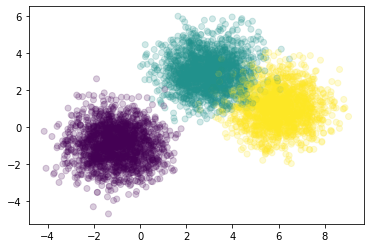

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(data[:,0], data[:,1], c=targets, alpha=0.2)

## Dataset preparation and one-hot encoding

To classify the dataset into three categories, we will create a model with three output neurons, one for each category. 

These neurons will have a softmax activation so that the output of the three neurons is normalized to one. 

In this way, for a given example, the neural network will produce a vector with three components, which can be taken as the probabilities for this example to belong to each category. 

Then, this vector must be compared to the example target to compute the loss. 

At the moment, the targets look like this: 


In [4]:
print(targets)
print(np.unique(targets))
print(targets.shape)

[1 0 0 ... 0 0 2]
[0 1 2]
(5000,)


We see that each target is a scalar, which is index of the true category of the example. 

To compare with the vectorial output of the neural network, we perform **one-hot encoding**: 

In [6]:
import tensorflow as tf
targets = tf.keras.utils.to_categorical(targets, 3)
print(targets)

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


Finally, we split the dataset into a training and a test dataset:

In [7]:
n_test = 1000
x_train = data[:-n_test]
y_train = targets[:-n_test]
x_test = data[-n_test:]
y_test = targets[-n_test:]

## Creating and fitting the model

We create a neural network with: 

* two input neurons, for the two components of our examples
* one hidden layer with 10 neurons, and a ReLU activation
* three output neurons with softmax activation, as we discussed above.

All layers are "dense", which means that each layer is fully connected to the neurons in the previous layer. 

In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, 
                          input_shape=(2,), 
                          activation='relu'),
    tf.keras.layers.Dense(3, 
                          activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 33        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


We compile the model, specifying: 

* the loss function
* the optimizer. Here we use Adam, which works well in general.
* the metrics to be computed during the training

In [42]:
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])

We can now fit the model to the data: 

In [43]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=50, epochs=20)

Epoch 1/20
80/80 [==============================] - 0s 4ms/step - loss: 1.2834 - accuracy: 0.3413 - val_loss: 0.9706 - val_accuracy: 0.3310
Epoch 2/20
80/80 [==============================] - 0s 3ms/step - loss: 0.7949 - accuracy: 0.5440 - val_loss: 0.6580 - val_accuracy: 0.7640
Epoch 3/20
80/80 [==============================] - 0s 3ms/step - loss: 0.5697 - accuracy: 0.8917 - val_loss: 0.4845 - val_accuracy: 0.9410
Epoch 4/20
80/80 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.9460 - val_loss: 0.3734 - val_accuracy: 0.9460
Epoch 5/20
80/80 [==============================] - 0s 3ms/step - loss: 0.3389 - accuracy: 0.9525 - val_loss: 0.2976 - val_accuracy: 0.9530
Epoch 6/20
80/80 [==============================] - 0s 3ms/step - loss: 0.2740 - accuracy: 0.9542 - val_loss: 0.2457 - val_accuracy: 0.9530
Epoch 7/20
80/80 [==============================] - 0s 3ms/step - loss: 0.2286 - accuracy: 0.9560 - val_loss: 0.2085 - val_accuracy: 0.9570
Epoch 8/20
80/80 [==

During the training, we see that the training and validation accuracies are very close, which indicates that this model does not overfit.

Finally, we plot the accuracy and the loss as a function of the epoch for both the training and test datasets: 

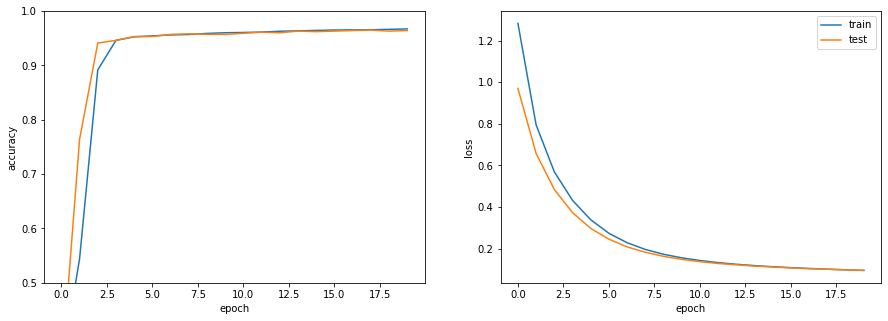

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.5,1)
plt.subplot(122)
train_h = plt.plot(history.history['loss'])
val_h = plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])


## Exercises

* Try a more complex model, with three hidden layers, each with 100 neurons. Does this model overfit? 
* Start again from the beginning, this time generating a 3D dataset (3 variables) with 4 blobs
* Recreate your model with the [functional API](https://keras.io/guides/functional_api/) and make sure you can fit it. 
